## Traditional ML classification models under wavelet analysis structures

In [1]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import sklearn
import scipy 
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

### Implementations
#### Configurations

In [2]:
# Configurations - Feature names
LOWLUX = 'lowlux'
MIDLUX = 'middlelux'
HIGHLUX = 'highlux'
NOBACK = 'nothing'
ONEBACK = 'ONEBACK'
TWOBACK = 'TWOBACK'
THREEBACK = 'THREEBACK'
FILENAME = 'Filename'
IPA2 = 'IPA 2'
INDEX = 'index'
LUX = 'Luminance'
LABELS = 'Labels'
ISBLINK_LEFT = 'isBlink-Left'
ISBLINK_RIGHT = 'isBlink-Right'
PID = 'PID'
AVE_DM = 'Averaged Diameter'
DIFF_DM = 'Difference Diameter'

IPA_LEFT = 'IPA Left'
IPA_RIGHT = 'IPA Right'

LHIPA_LEFT = 'LHIPA Left'
LHIPA_RIGHT = 'LHIPA Right'

MEAN_LEFT = 'Mean Left'
MEAN_RIGHT = 'Mean Right'

STD_LEFT = 'STD Left'
STD_RIGHT = 'STD Right'

SKEW_LEFT = 'Skew Left'
SKEW_RIGHT = 'Skew Right'

MAX_LEFT = 'MAX Left'
MAX_RIGHT = 'MAX Right'

MED_LEFT = 'Med Left'
MED_RIGHT = 'Med Right'

VAR_LEFT = 'Var Left'
VAR_RIGHT = 'Var Right'


# Model names.
KNN = 'KNN'
SVM = 'SVM'
RF = 'Random Forest'

# Training and testing ratio.
TEST_SIZE_PCT = 0.1

# Hyper-parameters tuning.
# Setting thresholds for 2 eyes' blinking rates.
THRES_BLINKING_RATE = 1.00 # The default value.
# The random forest layers.
RF_DEPTH = 10

#### Read data

In [3]:
# Read data and make them into processable formalities.
# filepath = '../Data/Results/21-11-13-13/results.csv' # Without ipa and lhipa features.
# filepath = '../Data/Results/22-11-22-23/results.csv' # With ipa and lhipa features. Sliding window: 5:3.
# filepath = '../Data/Results/23-11-09-08/results.csv' # With ipa and lhipa features. Sliding window: 5:4.
# filepath = '../Data/Results/23-11-09-51/results.csv' # With ipa and lhipa features. Sliding window: 2:1.6
# filepath = '../Data/Results/23-11-12-48/results.csv' # With ipa and lhipa features. Sliding window: 8-7
# filepath = '../Data/Results/23-11-14-06/results.csv' # With ipa and lhipa features. Sliding window: 10-8 
# filepath = '../Data/Results/23-11-14-24/results.csv' # With ipa and lhipa features. Sliding window: 10-9.5 --> # The longer the window, the more data, the better.
# filepath = '../Data/Results/23-11-15-59/results.csv' # Inclueded the PD statistical features. The best. Sliding window: 5-4.5 --> 0.98 --> Without lux, blinking rates, the pure time baseline and baseline + IPA, LHIPA would be still be great: 0.94; 0.96
filepath = '../Data/Results/23-11-16-17/results.csv'# Inclueded the PD statistical features. Sliding window: 10-9.5 --> 0.988;0.989
# filepath = '../Data/Results/23-11-16-24/results.csv'# Inclueded the PD statistical features. Sliding window: 4-3.5 --> 0.92;0.88
# filepath = '../Data/Results/23-11-16-55/results.csv'# Inclueded the PD statistical features. Sliding window: 4-3 --> 0.96;0.96
# filepath = '../Data/Results/23-11-16-36/results.csv'# Inclueded the PD statistical features. Sliding window: 5-4 --> 0.94;0.95
# filepath = '../Data/Results/23-11-16-43/results.csv'# Inclueded the PD statistical features. Sliding window: 5-2.5 --> 0.88;0.89

# filepath = '../Data/Results/23-11-18-07/results.csv'# Inclueded the PD statistical features. All participants, include RZ(04) and ZL (05). Sliding window: 4-3 -->

df_raw_features = pd.read_csv(filepath)

In [4]:
df_raw_features

,Left-0,Left-1,Left-2,Left-3,Left-4,Left-5,Left-6,Left-7,Left-8,Left-9,...,Skew Right,Med Left,Med Right,Var Left,Var Right,isBlink-Left,isBlink-Right,Luminance,PID,Labels
0,91.034258,89.989285,89.446541,90.484821,90.426471,90.335952,90.534715,90.501256,90.304912,90.299277,...,-0.119281,44.835669,47.854472,0.190063,0.143005,0.181667,0.204167,lowlux,7,nothing
1,89.189282,90.032590,90.520370,90.535173,89.393462,89.260975,89.723475,89.739829,89.843400,89.386548,...,0.008419,44.799225,47.808282,0.198361,0.136231,0.230000,0.254167,lowlux,7,nothing
2,89.405825,90.062178,89.889318,90.441738,90.071239,89.969749,89.973210,89.938218,89.923749,89.902937,...,-0.129783,44.773462,47.766716,0.216425,0.150474,0.230000,0.282500,lowlux,7,nothing
3,89.058885,89.907091,89.644695,89.760700,89.699774,89.692021,89.670517,89.651260,89.632876,89.609174,...,-0.896618,44.702301,47.700790,0.236820,0.230274,0.195833,0.249167,lowlux,7,nothing
4,89.923877,90.984776,90.424379,90.550879,90.366908,90.284532,90.175600,90.071465,89.966849,89.862239,...,-0.922345,44.628348,47.634362,0.256613,0.318382,0.151667,0.199167,lowlux,7,nothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,-1.471384,46.624676,45.735457,0.000000,0.094499,1.000000,0.642500,lowlux,2,THREEBACK
10686,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,-1.138926,46.624676,45.715159,0.000000,0.112280,1.000000,0.592500,lowlux,2,THREEBACK
10687,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,-0.886028,46.624676,45.704050,0.000000,0.127856,1.000000,0.572500,lowlux,2,THREEBACK
10688,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,-0.737039,46.624676,45.677089,0.000000,0.140126,1.000000,0.598333,lowlux,2,THREEBACK


#### Encoder

This part encodes features into numeric values.

In [5]:
# Encoding Lux and Labeling
def encode(df_input):
    luxes = []
    nbacks = []
#     df_numeric_features = df_raw_features.copy()
    df_numeric_features = df_input.copy()

    for index, row in df_numeric_features.iterrows():
        # Label luxes
        if LOWLUX in row[LUX]:
            luxes.append(1)
        elif MIDLUX in row[LUX]:
            luxes.append(2)
        elif HIGHLUX in row[LUX]:
            luxes.append(3)

        # Label task difficulties
        if NOBACK in row[LABELS]:
            nbacks.append(0)
        elif ONEBACK in row[LABELS]:
            nbacks.append(1)
        elif TWOBACK in row[LABELS]:
            nbacks.append(2)
        elif THREEBACK in row[LABELS]:
            nbacks.append(3)

    df_numeric_features[LUX] = luxes
    df_numeric_features[LABELS] = nbacks
    
    # Output the results
    df_output = df_numeric_features.copy()
    return df_output

#### Data visualization

In [6]:
# sns.pairplot(df_labels_IPA2, hue=LABELS)

#### Auxiliary functions

In [7]:
# Show machine learning models' performance.
def show_performance(y_true, y_pred, model_name):
    # Get the accuracy score.
    acc_score = accuracy_score(y_true, y_pred)
    
    # Get the F1 score.
    # I chose the macro for worrying about the imbanlance of labels. In my case, since I don't filter instances bsed on blinking rates, I use micro.
    # Ref: https://datascience.stackexchange.com/questions/40900/whats-the-difference-between-sklearn-f1-score-micro-and-weighted-for-a-mult. The 'micro' uses the global number of TP, FN, FP and calculates the F1 directly without favouring any classes.
    f1_score = sklearn.metrics.f1_score(y_true, y_pred, average='macro')  # Before resetting the 0-back time equals to the 1,2,3-backs, I use the macro.
    
    # Get the confusion matrices and display them.
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(cm)
    
    # Plot the confusion matrix.
    ax = plt.figure().subplots()
    ax.set(title=model_name + " MODEL")
    
    cm_display.plot(ax=ax)
    plt.show()
    
    return acc_score, f1_score

In [8]:
# Plot class distributions with a bar chart.
# Learnt from the quora here.https://stackoverflow.com/questions/63650646/add-labels-and-title-to-a-plot-made-using-pandas.
def plot_class_distribution(df_input, title, x_label, y_label, class_column):
    df = df_input.copy()
    ax = pd.Series(df[class_column]).value_counts().sort_index()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax.plot(kind='bar')
    plt.show()
    return None

#### Clean the instances and features

In [9]:
# Select validated rows/instances by thresholdings.
def validate_instances(df_input):
    df = df_input.copy()
    
#     # Plot the original class distributions.
#     plot_class_distribution(df_input=df, title='Original instances - class distribution', x_label='Classes', y_label='Instances', class_column=LABELS) # class distributions before.
    
    # Remove instances with high blinking rates.
    before_blinking_filter = len(df)
    df = df.loc[df[ISBLINK_LEFT] <= THRES_BLINKING_RATE]
    df = df.loc[df[ISBLINK_RIGHT] <= THRES_BLINKING_RATE]
    after_blinking_filter = len(df)
    lost_data_num = before_blinking_filter - after_blinking_filter
    print('The blinking threshold is: ' + str(THRES_BLINKING_RATE) + '. Before there was: ' + str(before_blinking_filter) + ' instances, then there is : ' + str(after_blinking_filter) + ' instances. ' + str(lost_data_num) + ' instances are lost.')
    plot_class_distribution(df_input=df, title='Tuned instances - class distribution', x_label='Classes', y_label='Instances', class_column=LABELS) # Show the class distributions after tuning.
    
#     # Try with less classes.
#     df = df.loc[df[LABELS] < 3] # Try with 3 labels: 0, 1, 2 since LHIPA was not sensitive to the THREEBACKs.
#     df = df.loc[df[LABELS] != 1] # Try with 3 labels: 0, 2 since LHIPA was not sensitive to these 2 classes. dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
    
    df_train = df.loc[df[PID] != 8] # <TODO: this part needs to be improved>
    df_test = df.loc[df[PID] == 8]
    
    
#     # Reset the index.
#     df = df.reset_index()
#     df = df.loc[:, df.columns != 'index']
    
    # Get the output.
    df_output = df.copy()
    
    df_output_train = df_train.copy()
    df_output_test = df_test.copy()
    
    return df_output_train, df_output_test

In [10]:
def select_features(df_input, selected_feature_sets, dropped_feature_sets):
    df = df_input.copy()
    
    # Feature selection
    # Remove PID label / feature.
    df = df.loc[:, df.columns != PID]
    
    # Remove lux
    df = df.loc[:, df.columns != LUX]
    
#     # Remove the blinking rates related features.
#     df = df.loc[:, df.columns != ISBLINK_LEFT]
#     df = df.loc[:, df.columns != ISBLINK_RIGHT]
    
    # Select features according to needs.
    if dropped_feature_sets is False and selected_feature_sets is not False:
        selected_feature_sets.append(ISBLINK_LEFT)
        selected_feature_sets.append(ISBLINK_RIGHT)
#         selected_feature_sets.append(LUX)
        
        selected_feature_sets.append(LABELS)
        df_output = df[selected_feature_sets] 
        
        # Remove appended features.
        selected_feature_sets.remove(LABELS)
        selected_feature_sets.remove(ISBLINK_LEFT)
        selected_feature_sets.remove(ISBLINK_RIGHT)
    elif selected_feature_sets is False and dropped_feature_sets is not False:
        for feature in dropped_feature_sets:
            df = df.loc[:, df.columns != feature]
        df_output = df.copy()
    elif dropped_feature_sets is False and selected_feature_sets is False:
        df_output = df.copy()
    
    return df_output

#### Run the models

In [11]:
# Run the models, get the results.
def train_test_models(df_input, df_test, label_string): # <TODO> need to modify later.
    df = df_input.copy()
    
    # Split dataset.
    
    # K-fold way.
#     # Get the X and y sets.
#     X = df.loc[:, df.columns != LABELS].to_numpy()
#     y = df.loc[:, df.columns == LABELS].to_numpy()
#     y = np.reshape(y, -1)
    
#     # Split the data into training dataset and validation dataset.
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PCT, random_state=999)

###################################### Testing area #################################
    df_test = df_test.copy()
    
    X_train = df.loc[:, df.columns != LABELS].to_numpy()
    y_train = df.loc[:, df.columns == LABELS].to_numpy()
    y_train = np.reshape(y_train, -1)
    
    X_test = df_test.loc[:, df_test.columns != LABELS].to_numpy()
    y_test = df_test.loc[:, df_test.columns == LABELS].to_numpy()
    y_test = np.reshape(y_test, -1)
######################################################################################
    
    # Train with models.
    print('------------------------------------------------' + label_string + ' Model ------------------------------------------------')
    
#     # SVM model. TODO: try the SVM model mentioned in 2022 ISMAR and boosting method, and also feature selection method.
#     clf_svm = make_pipeline(StandardScaler(),SVC(kernel='poly', degree=7)) #SVC(kernel='rbf', gamma='auto'))
#     # Try SVM, bacause it is one of the most widely used models in cognitive workload claissfications.
#     clf_svm.fit(X_train, y_train)
#     y_pred_svm = clf_svm.predict(X_test)
#     score_svm = show_performance(y_true=y_test, y_pred=y_pred_svm, model_name = SVM)
    acc_score_svm = 0
    
    # KNN model.
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    # Train the model.
    clf_knn.fit(X_train, y_train)
    # Test.
    y_pred_knn = clf_knn.predict(X_test)
    acc_score_knn, f1_score_knn = show_performance(y_true=y_test, y_pred=y_pred_knn, model_name = KNN)
    
    # Random Forest model.
    clf_rf = RandomForestClassifier(max_depth=RF_DEPTH, random_state=999)
    # Train the model.
    clf_rf.fit(X_train, y_train)
    # Test.
    y_pred_rf = clf_rf.predict(X_test)
    acc_score_rf, f1_score_rf = show_performance(y_true=y_test, y_pred=y_pred_rf, model_name = RF)
    
    # Print the results.
    print('\nThe KNN accuracy is: ' + str(acc_score_knn) +  '\nThe RF accuracy is: ' + str(acc_score_rf))
    print('\nThe KNN F1 is: ' + str(f1_score_knn) +  '\nThe RF F1 is: ' + str(f1_score_rf))
    print('\nThe used features are: ') # Briefly display the features utilized.
    print(df)
    
    # Output the data.
    df_output = df.copy()
    return df_output

#### Machine Learning Implementations

The blinking threshold is: 1.0. Before there was: 10690 instances, then there is : 10690 instances. 0 instances are lost.


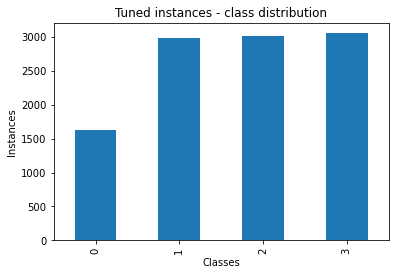

------------------------------------------------Time-domain-based Features Model ------------------------------------------------


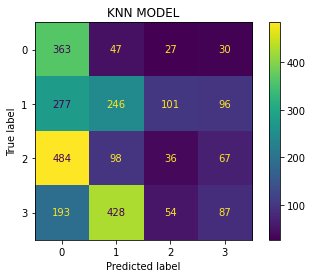

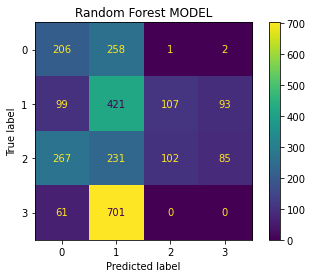


The KNN accuracy is: 0.27790432801822323
The RF accuracy is: 0.2767653758542141

The KNN F1 is: 0.2433398913440151
The RF F1 is: 0.24092419416441763

The used features are: 
       Averaged Diameter  Difference Diameter  Mean Left  Mean Right  \
0              46.345515            -2.967561  44.861734   49.251587   
1              46.310302            -2.970814  44.824895   49.251587   
2              46.262647            -2.944221  44.790537   49.251587   
3              46.196961            -2.897179  44.748371   49.251587   
4              46.140701            -2.861161  44.710120   49.251587   
...                  ...                  ...        ...         ...   
10685          46.141200             0.966951  46.624676   45.475067   
10686          46.121692             1.005967  46.624676   45.475067   
10687          46.103429             1.042494  46.624676   45.475067   
10688          46.075288             1.098775  46.624676   45.475067   
10689          46.049872         

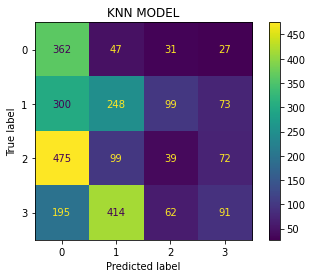

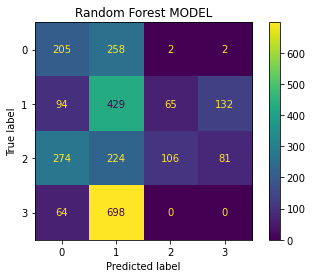


The KNN accuracy is: 0.2809415337889142
The RF accuracy is: 0.2809415337889142

The KNN F1 is: 0.2474417367761623
The RF F1 is: 0.24671537823816744

The used features are: 
       Averaged Diameter  Difference Diameter  Mean Left  Mean Right  \
0              46.345515            -2.967561  44.861734   49.251587   
1              46.310302            -2.970814  44.824895   49.251587   
2              46.262647            -2.944221  44.790537   49.251587   
3              46.196961            -2.897179  44.748371   49.251587   
4              46.140701            -2.861161  44.710120   49.251587   
...                  ...                  ...        ...         ...   
10685          46.141200             0.966951  46.624676   45.475067   
10686          46.121692             1.005967  46.624676   45.475067   
10687          46.103429             1.042494  46.624676   45.475067   
10688          46.075288             1.098775  46.624676   45.475067   
10689          46.049872          

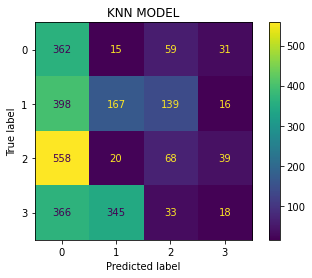

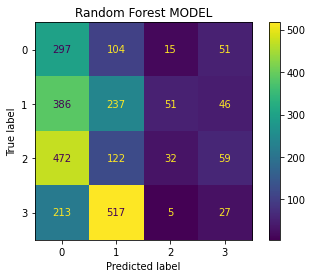


The KNN accuracy is: 0.23348519362186787
The RF accuracy is: 0.22513287775246774

The KNN F1 is: 0.19499607319303355
The RF F1 is: 0.18522259568428542

The used features are: 
          Left-0     Left-1     Left-2     Left-3     Left-4     Left-5  \
0      91.034258  89.989285  89.446541  90.484821  90.426471  90.335952   
1      89.189282  90.032590  90.520370  90.535173  89.393462  89.260975   
2      89.405825  90.062178  89.889318  90.441738  90.071239  89.969749   
3      89.058885  89.907091  89.644695  89.760700  89.699774  89.692021   
4      89.923877  90.984776  90.424379  90.550879  90.366908  90.284532   
...          ...        ...        ...        ...        ...        ...   
10685  93.249352  93.249352  93.249352  93.249352  93.249352  93.249352   
10686  93.249352  93.249352  93.249352  93.249352  93.249352  93.249352   
10687  93.249352  93.249352  93.249352  93.249352  93.249352  93.249352   
10688  93.249352  93.249352  93.249352  93.249352  93.249352  93.249352  

,Left-0,Left-1,Left-2,Left-3,Left-4,Left-5,Left-6,Left-7,Left-8,Left-9,...,STD Right,Skew Left,Skew Right,Med Left,Med Right,Var Left,Var Right,isBlink-Left,isBlink-Right,Labels
0,91.034258,89.989285,89.446541,90.484821,90.426471,90.335952,90.534715,90.501256,90.304912,90.299277,...,0.378160,0.474472,-0.119281,44.835669,47.854472,0.190063,0.143005,0.181667,0.204167,0
1,89.189282,90.032590,90.520370,90.535173,89.393462,89.260975,89.723475,89.739829,89.843400,89.386548,...,0.369094,0.505909,0.008419,44.799225,47.808282,0.198361,0.136231,0.230000,0.254167,0
2,89.405825,90.062178,89.889318,90.441738,90.071239,89.969749,89.973210,89.938218,89.923749,89.902937,...,0.387910,0.466743,-0.129783,44.773462,47.766716,0.216425,0.150474,0.230000,0.282500,0
3,89.058885,89.907091,89.644695,89.760700,89.699774,89.692021,89.670517,89.651260,89.632876,89.609174,...,0.479868,0.489478,-0.896618,44.702301,47.700790,0.236820,0.230274,0.195833,0.249167,0
4,89.923877,90.984776,90.424379,90.550879,90.366908,90.284532,90.175600,90.071465,89.966849,89.862239,...,0.564253,0.511874,-0.922345,44.628348,47.634362,0.256613,0.318382,0.151667,0.199167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,0.307407,0.000000,-1.471384,46.624676,45.735457,0.000000,0.094499,1.000000,0.642500,3
10686,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,0.335082,0.000000,-1.138926,46.624676,45.715159,0.000000,0.112280,1.000000,0.592500,3
10687,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,0.357570,0.000000,-0.886028,46.624676,45.704050,0.000000,0.127856,1.000000,0.572500,3
10688,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,0.374334,0.000000,-0.737039,46.624676,45.677089,0.000000,0.140126,1.000000,0.598333,3


In [12]:
# The pipeline for experiments.

# Encode features into numeric values.
df_numeric_features = encode(df_input=df_raw_features)

# Get validated instances.
df_train, df_test = validate_instances(df_input=df_numeric_features)


# Looping and fine-tuning hyper-parameters. <TODO>

# Compare different features.
# Time-domain baseline feature sets.
time_domain_features = [AVE_DM, DIFF_DM, MEAN_LEFT, MEAN_RIGHT, VAR_LEFT, VAR_RIGHT, STD_LEFT, STD_RIGHT, MAX_LEFT, MAX_RIGHT, SKEW_LEFT, SKEW_RIGHT, MED_LEFT, MED_RIGHT]
df_baseline_time_features = select_features(df_input=df_train, selected_feature_sets=time_domain_features, dropped_feature_sets=False)
# train_test_models(df_input=df_baseline_time_features, label_string='Time-domain-based Features')

df_baseline_time_features_test = select_features(df_input=df_test, selected_feature_sets=time_domain_features, dropped_feature_sets=False)
train_test_models(df_input=df_baseline_time_features, df_test=df_baseline_time_features_test, label_string='Time-domain-based Features')

# # Freqeuncy baseline feature sets.
# freq_domain_ipa_features = [IPA_LEFT, IPA_RIGHT]
# df_baseline_freq_features_ipa = select_features(df_input=df_all_features, selected_feature_sets=freq_domain_ipa_features, dropped_feature_sets=False)
# train_test_models(df_input=df_baseline_freq_features_ipa, label_string='Freq-domain-based IPA Features')

# freq_domain_lhipa_features = [LHIPA_LEFT, LHIPA_RIGHT]
# df_baseline_freq_features_lhipa = select_features(df_input=df_all_features, selected_feature_sets=freq_domain_lhipa_features, dropped_feature_sets=False)
# train_test_models(df_input=df_baseline_freq_features_lhipa, label_string='Freq-domain-based LHIPA Features')

# # Only wavelet coefficients features.
# dropped_IPA_LHIPA_AVE_DIFF = [AVE_DM, DIFF_DM, IPA_LEFT, IPA_RIGHT, LHIPA_LEFT, LHIPA_RIGHT]
# df_only_coefs = select_features(df_input=df_all_features, selected_feature_sets=False, dropped_feature_sets=dropped_IPA_LHIPA_AVE_DIFF)
# train_test_models(df_input=df_only_coefs, label_string='Only Wavelet Coefficients Features')

# IPA LHIPA and AVE_DM + DF_DM features.
freq_time_baseline_features = [AVE_DM, DIFF_DM, MEAN_LEFT, MEAN_RIGHT, VAR_LEFT, VAR_RIGHT, STD_LEFT, STD_RIGHT, MAX_LEFT, MAX_RIGHT, SKEW_LEFT, SKEW_RIGHT, MED_LEFT, MED_RIGHT,IPA_LEFT, IPA_RIGHT, LHIPA_LEFT, LHIPA_RIGHT]
df_baselines = select_features(df_input=df_train, selected_feature_sets=freq_time_baseline_features, dropped_feature_sets=False)
# train_test_models(df_input=df_baselines, label_string='All Time and Frequency Domain Baseline Features')

df_baselines_test = select_features(df_input=df_test, selected_feature_sets=freq_time_baseline_features, dropped_feature_sets=False)
train_test_models(df_input=df_baselines, df_test=df_baselines_test, label_string='All Time and Frequency Domain Baseline Features')



# My proposed feature based features.
dropped_IPA_LHIPA_features = [IPA_LEFT, IPA_RIGHT, LHIPA_LEFT, LHIPA_RIGHT]
df_proposed = select_features(df_input=df_train, selected_feature_sets=False, dropped_feature_sets=dropped_IPA_LHIPA_features)
# train_test_models(df_input=df_proposed, label_string='My Proposed Features')

df_proposed_test = select_features(df_input=df_test, selected_feature_sets=False, dropped_feature_sets=dropped_IPA_LHIPA_features)
train_test_models(df_input=df_proposed, df_test=df_proposed_test, label_string='My Proposed Features')


# # All features baseline.
# df_all_baseline = select_features(df_input=df_all_features, selected_feature_sets=False, dropped_feature_sets=False)
# train_test_models(df_input=df_all_baseline, label_string='All Features')

## TODO list

In [13]:
# <TODO: get an arguments stuff>
# def parse_args():
#     parser = argparse.ArgumentParser()
#     parser.add_argument("--path", type=str, default='/content/gdrive/MyDrive/CS5242/project', 
#                         help="path")
#     parser.add_argument('--using_cuda', type=bool, default=True,
#                         help='cuda/cpu')
#     parser.add_argument('--gpu_ids', type=bool, default=[0],
#                         help='cuda/cpu')
#     parser.add_argument('--times', type=int, default=1,
#                         help='loop times of the whole process')
#     parser.add_argument('--sequence_len', type=int, default=1,
#                         help='20/1')
#     parser.add_argument('--train', type=bool, default=True,
#                         help='')
#     parser.add_argument('--predict', type=bool, default=True,
#                         help='')
#     parser.add_argument('--debug_mode', type=bool, default=False,
#                         help='adjust parameters ?')
#     # parser.add_argument('--model', type=str, default='bert',
#     #                     help='support bert/bert_lstm/bert_cnn/word2vec')
#     parser.add_argument('--model', type=str, default='MLP', choices=['bert', 'bert_lstm', 'bert_cnn', 'word2vec', 'MLP'], help='support bert/bert_lstm/bert_cnn/word2vec/MLP')
    
#     parser.add_argument('--language', type=str, default='en',
#                         help='support en')
#     parser.add_argument('--early_stop', type=int, default=60,
#                         help='')
#     parser.add_argument('--features_dim', type=int, default=768,# ?
#                         help='')
#     parser.add_argument('--batch_size', type=int, default=16,
#                         help='')
#     parser.add_argument('--train_rate', type=float, default=0.6,
#                         help='')
#     parser.add_argument('--test_rate', type=float, default=0.2,
#                         help='')
#     parser.add_argument('--num_workers', type=int, default=0,
#                         help='num workers of loading data')
    
#     parser.add_argument('--label', type=str, default='activation',
#                         help='support activation/polarity')
#     parser.add_argument('--num_classes', type=int, default=3,
#                         help='class number')
    
#     parser.add_argument('--train_size', type=str, default='normal',
#                         help='normal')
#     parser.add_argument('--model_save_path', type=str, default='model_save',
#                         help='path to save model.')
#     parser.add_argument('--data_dir', type=str, default='/word2vec.pkl',
#                         help='path to data directory word2vec.pkl/bert_feature.pkl')
#     parser.add_argument('--log_path', type=str, default='/content/gdrive/MyDrive/CS5242/project/log/',
#                     help='path to data directory feature.pkl')
#     return parser.parse_args(args = [])
#
#     args = parse_args()
# def parse_args():
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--max_seq_length', type=int, default = 50,
#                         help='length')
#     parser.add_argument('-f')
#     return parser.parse_args()
# 
#     save_data(args, features, '/word2vec.pkl')
# def save_data(args, features, save_path):
#     path = os.path.abspath(os.path.join(os.getcwd(), ".."))
#     with open(os.path.join(path, "data/" + save_path),'wb') as file_obj:
#         pickle.dump(features,file_obj)
#         print('Save Successful!')